In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\umesh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv(r"C:\Users\umesh\Downloads\archive\healthcare_dataset.csv")
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)


Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [4]:
df[df.isnull()].count()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
#Duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicate rows: 534


In [6]:
print(df.columns)

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')


In [7]:
 #Column Name Standardization
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [8]:
# Fixing Capitalization in Text Columns
text_columns = ['name', 'gender', 'blood_type', 'medical_condition',
                'doctor', 'hospital', 'insurance_provider', 
                'admission_type', 'medication', 'test_results']

for col in text_columns:
    df[col] = df[col].str.strip().str.title()
print(text_columns)


['name', 'gender', 'blood_type', 'medical_condition', 'doctor', 'hospital', 'insurance_provider', 'admission_type', 'medication', 'test_results']


In [9]:
# Convert Dates to datetime Format
df['date_of_admission'] = pd.to_datetime(df['date_of_admission'])
df['discharge_date'] = pd.to_datetime(df['discharge_date'])

# Optional: Calculate length of stay
df['stay_duration'] = (df['discharge_date'] - df['date_of_admission']).dt.days
print(df)


                    name  age  gender blood_type medical_condition  \
0          Bobby Jackson   30    Male         B-            Cancer   
1           Leslie Terry   62    Male         A+           Obesity   
2            Danny Smith   76  Female         A-           Obesity   
3           Andrew Watts   28  Female         O+          Diabetes   
4          Adrienne Bell   43  Female        Ab+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  Elizabeth Jackson   42  Female         O+            Asthma   
55496         Kyle Perez   61  Female        Ab-           Obesity   
55497       Heather Wang   38  Female         B+      Hypertension   
55498     Jennifer Jones   43    Male         O-         Arthritis   
55499       James Garcia   53  Female         O+         Arthritis   

      date_of_admission            doctor                      hospital  \
0            2024-01-31     Matthew Smith               Sons And Miller   
1        

In [10]:
# View billing amount stats
print(df['billing_amount'].describe())

# Filter out negative values
df = df[df['billing_amount'] >= 0]
print(df)

count    54966.000000
mean     25544.306284
std      14208.409711
min      -2008.492140
25%      13243.718641
50%      25542.749145
75%      37819.858159
max      52764.276736
Name: billing_amount, dtype: float64
                    name  age  gender blood_type medical_condition  \
0          Bobby Jackson   30    Male         B-            Cancer   
1           Leslie Terry   62    Male         A+           Obesity   
2            Danny Smith   76  Female         A-           Obesity   
3           Andrew Watts   28  Female         O+          Diabetes   
4          Adrienne Bell   43  Female        Ab+            Cancer   
...                  ...  ...     ...        ...               ...   
55495  Elizabeth Jackson   42  Female         O+            Asthma   
55496         Kyle Perez   61  Female        Ab-           Obesity   
55497       Heather Wang   38  Female         B+      Hypertension   
55498     Jennifer Jones   43    Male         O-         Arthritis   
55499       James

In [11]:
for col in ['gender', 'blood_type', 'admission_type', 'test_results']:
    print(f"{col}: {df[col].unique()}")


gender: ['Male' 'Female']
blood_type: ['B-' 'A+' 'A-' 'O+' 'Ab+' 'Ab-' 'B+' 'O-']
admission_type: ['Urgent' 'Emergency' 'Elective']
test_results: ['Normal' 'Inconclusive' 'Abnormal']


In [12]:
def group_rare(series, threshold=100):
    freq = series.value_counts()
    return series.apply(lambda x: x if freq[x] >= threshold else 'Other')

df['doctor'] = group_rare(df['doctor'])
df['hospital'] = group_rare(df['hospital'])
df['insurance_provider'] = group_rare(df['insurance_provider'])
df

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,stay_duration
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Other,Other,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Other,Other,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Other,Other,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Other,Other,Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,Adrienne Bell,43,Female,Ab+,Cancer,2022-09-19,Other,Other,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,Elizabeth Jackson,42,Female,O+,Asthma,2020-08-16,Other,Other,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,30
55496,Kyle Perez,61,Female,Ab-,Obesity,2020-01-23,Other,Other,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55497,Heather Wang,38,Female,B+,Hypertension,2020-07-13,Other,Other,Unitedhealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55498,Jennifer Jones,43,Male,O-,Arthritis,2019-05-25,Other,Other,Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,6


In [13]:
df.to_csv("cleaned_healthcare_dataset.csv", index=False)


In [14]:
df=pd.read_csv(r"cleaned_healthcare_dataset.csv")

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
# Columns to encode
categorical_cols = ['gender', 'blood_type', 'doctor', 'hospital',
                    'insurance_provider', 'admission_type', 'medication', 'test_results', 'medical_condition']

# Apply Label Encoding
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le
print(le_dict)


{'gender': LabelEncoder(), 'blood_type': LabelEncoder(), 'doctor': LabelEncoder(), 'hospital': LabelEncoder(), 'insurance_provider': LabelEncoder(), 'admission_type': LabelEncoder(), 'medication': LabelEncoder(), 'test_results': LabelEncoder(), 'medical_condition': LabelEncoder()}


In [17]:
# Define X and y
features = ['age', 'gender', 'blood_type', 'stay_duration', 'billing_amount',
            'insurance_provider', 'admission_type', 'test_results']

X = df[features]
y = df['medical_condition']
print(features)


['age', 'gender', 'blood_type', 'stay_duration', 'billing_amount', 'insurance_provider', 'admission_type', 'test_results']


In [18]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the DataFrame to avoid modifying original
df_encoded = df.copy()

# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()

# Encode each categorical column
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    label_encoders[col] = le


In [19]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [20]:
# Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
#  Evaluate the Model
y_pred = model.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[524 284 286 263 241 264]
 [282 548 259 283 264 243]
 [284 289 550 267 249 216]
 [266 257 256 540 276 237]
 [241 276 250 254 502 239]
 [258 247 259 247 228 543]]
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.28      0.28      1862
           1       0.29      0.29      0.29      1879
           2       0.30      0.30      0.30      1855
           3       0.29      0.29      0.29      1832
           4       0.29      0.28      0.29      1762
           5       0.31      0.30      0.31      1782

    accuracy                           0.29     10972
   macro avg       0.29      0.29      0.29     10972
weighted avg       0.29      0.29      0.29     10972



In [22]:
# For better visuals
sns.set(style="whitegrid")

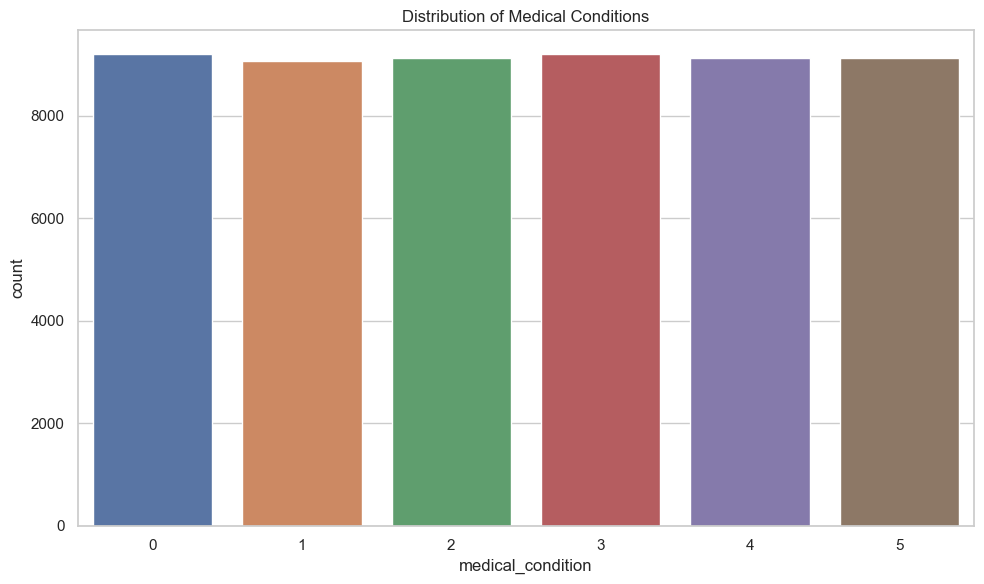

In [33]:
#  Target Variable Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='medical_condition', data=df)
plt.title("Distribution of Medical Conditions")
plt.xticks
plt.tight_layout()
plt.show()


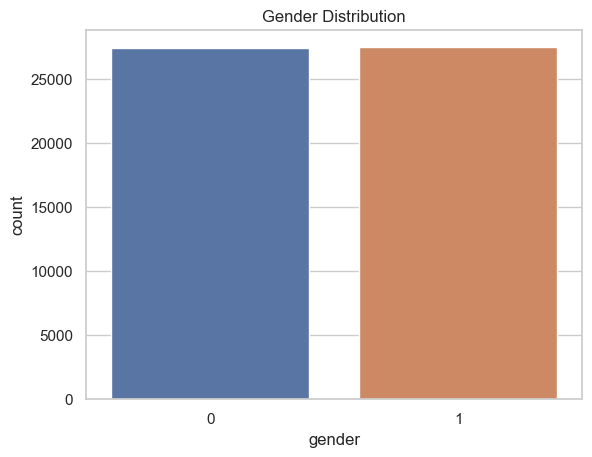

In [24]:
#  Gender Distribution
sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
plt.show()


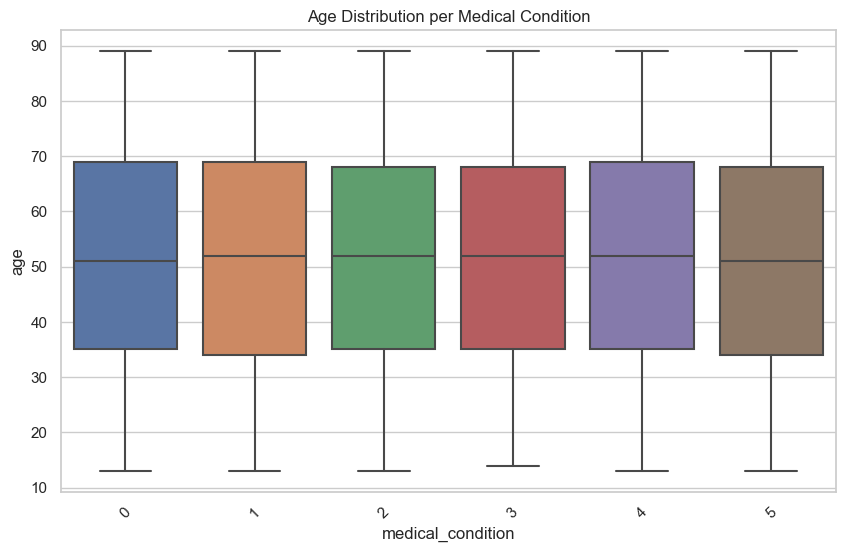

In [25]:
# Age Distribution by Condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='medical_condition', y='age', data=df)
plt.title("Age Distribution per Medical Condition")
plt.xticks(rotation=45)
plt.show()


C:\Users\umesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


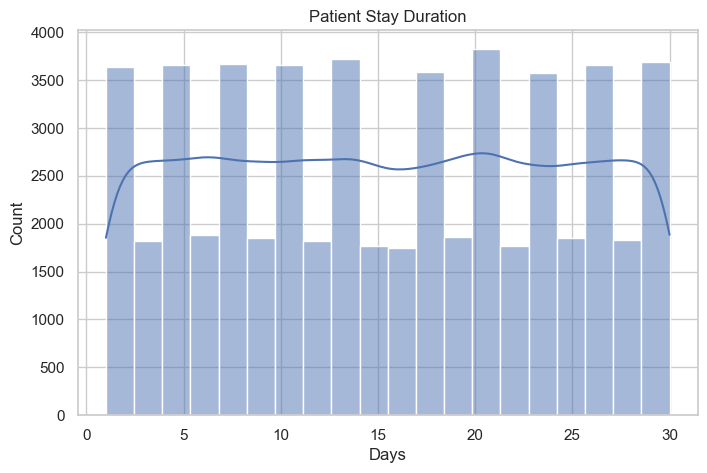

In [26]:
# Stay Duration Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['stay_duration'], bins=20, kde=True)
plt.title("Patient Stay Duration")
plt.xlabel("Days")
plt.show()


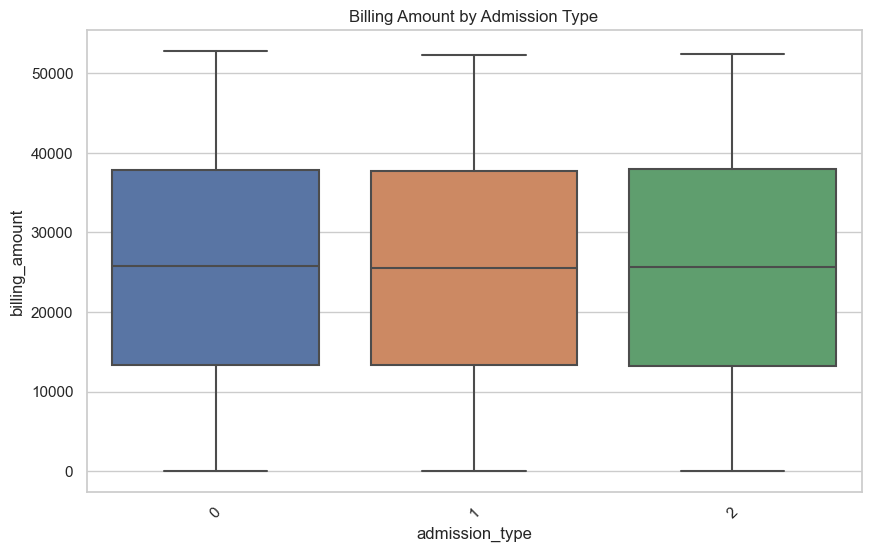

In [27]:
# Billing Amount by Admission Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='admission_type', y='billing_amount', data=df)
plt.title("Billing Amount by Admission Type")
plt.xticks(rotation=45)
plt.show()


C:\Users\umesh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


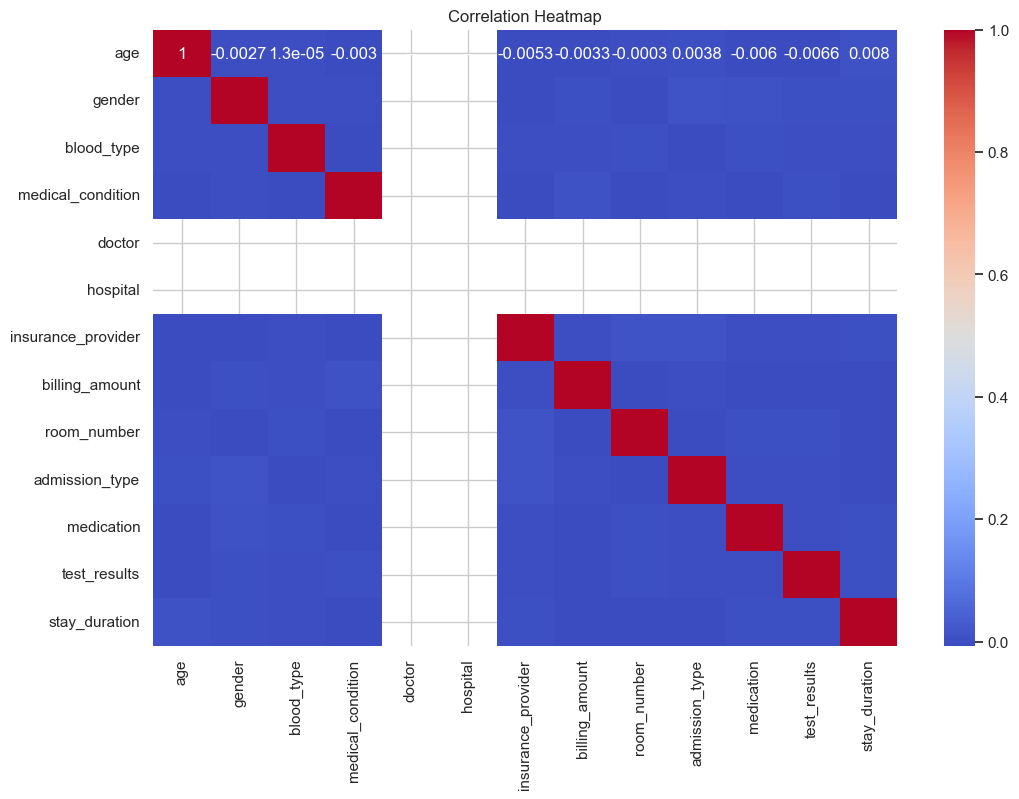

In [28]:
# Correlation Heatmap (Numerical Features)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


C:\Users\umesh\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


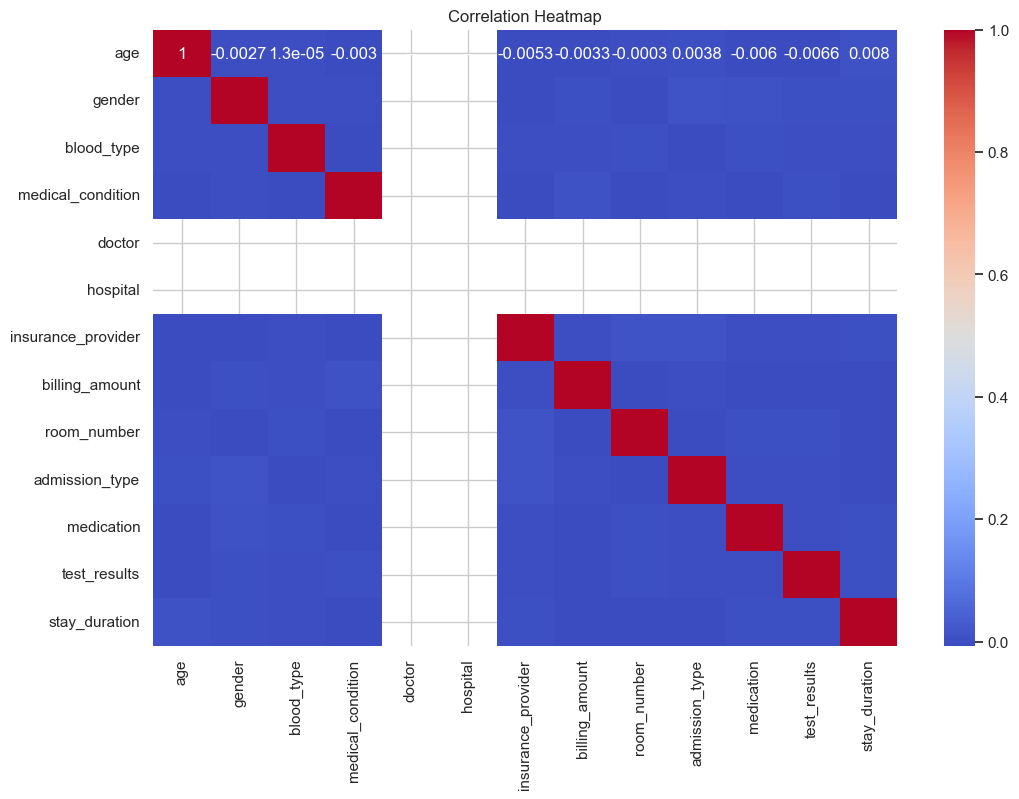

In [29]:
#  Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


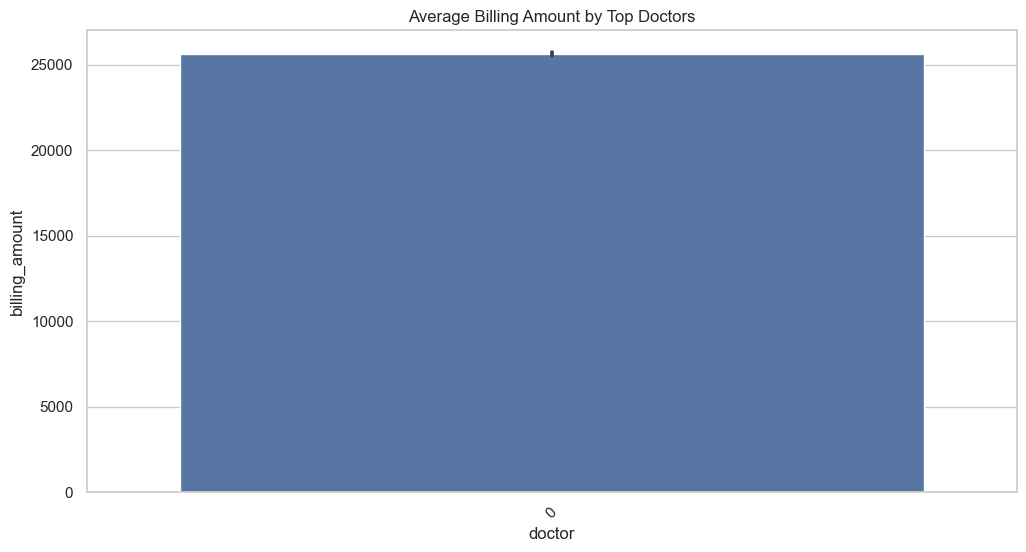

In [30]:
# Average Billing per Doctor
top_doctors = df['doctor'].value_counts().nlargest(10).index
df_top = df[df['doctor'].isin(top_doctors)]

plt.figure(figsize=(12, 6))
sns.barplot(x='doctor', y='billing_amount', data=df_top, estimator=np.mean)
plt.title("Average Billing Amount by Top Doctors")
plt.xticks(rotation=45)
plt.show()
